In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../data/train-data.csv')
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [3]:
df.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True)

# Name

In [4]:
df.Name.sample(10)

4929                 Hyundai Creta 1.6 SX
803              Honda Jazz 1.2 VX i VTEC
1658        Hyundai Verna 1.6 SX VTVT (O)
183     Chevrolet Optra Magnum 1.6 LS BS3
4165              Maruti Wagon R VXI Plus
1170               Maruti Swift Dzire VXi
1555            Chevrolet Optra 1.6 Elite
5403                Honda Amaze S i-Dtech
1783               Maruti Wagon R VXI AMT
4935               Toyota Fortuner 4x4 MT
Name: Name, dtype: object

`There is a pattern in the 'Name' column. The brand name appears first followed by the model name.
 We can extract them into separate columns.`

In [5]:
df.Name.str.contains('Land Rover').sum()

60

In [6]:
df.Name[df.Name.str.contains('Land Rover')].sample(5)

1204                          Land Rover Freelander 2 HSE
4755    Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic
1299                       Land Rover Discovery 4 TDV6 SE
1505                      Land Rover Range Rover Sport SE
4079          Land Rover Range Rover 3.0 Diesel LWB Vogue
Name: Name, dtype: object

In [7]:
sample_car = df.loc[10, 'Name']
sample_car.split(' ')[0]  # Brand

'Maruti'

In [8]:
def get_brand(name):
    if name.startswith('Land Rover'):
        return 'Land Rover'
    return name.split(' ')[0]

sample_car = df.loc[1505, 'Name']
get_brand(sample_car)

'Land Rover'

In [9]:
df['Brand'] = df.Name.apply(get_brand)

In [10]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price    Brand  
0   1.75   Maruti  
1  12.50  Hyundai  
2   4.50    Honda  
3   6.00   Maruti  
4  17.74     Audi

In [11]:
df[df.Name.str.contains('Land Rover')].sample(5)

Name    Location  Year  \
404           Land Rover Range Rover 2.2L Prestige  Coimbatore  2017   
3540  Land Rover Discovery Sport SD4 HSE Luxury 7S   Hyderabad  2016   
4869      Land Rover Range Rover 3.6 TDV8 Vogue SE  Coimbatore  2012   
5016               Land Rover Freelander 2 TD4 HSE       Delhi  2013   
1204                   Land Rover Freelander 2 HSE   Hyderabad  2012   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
404               34990    Diesel    Automatic      First   12.7 kmpl   
3540              62000    Diesel    Automatic      First  12.51 kmpl   
4869              84384    Diesel    Automatic      First   10.2 kmpl   
5016              72000    Diesel    Automatic      First    0.0 kmpl   
1204              96000    Diesel    Automatic      First  12.35 kmpl   

       Engine       Power  Seats  Price       Brand  
404   2179 CC   187.7 bhp    5.0  53.83  Land Rover  
3540  2179 CC   187.7 bhp    7.0  44.50  Land Rover  
4869  4367 CC     308 bhp    7.0  52.54  Land Rover  
5016  2179 CC     115 bhp    5.0  15.50  Land Rover  
1204  2179 CC  187.74 bhp    5.0  18.98  Land Rover

In [12]:
import numpy as np
for i in np.random.randint(0, len(df), 5):
    sample_car = df.loc[i, 'Name']
    print(sample_car.split(' ')[1])   # MODEL

i10
Creta
Fortuner
Alto
Etios


In [13]:
sample_car = df[df.Name.str.contains('Land Rover')].reset_index().loc[50, 'Name']
print(sample_car)

Land Rover Discovery Sport TD4 HSE 7S


In [14]:
def get_model(name):
    if name.startswith('Land Rover Range Rover'):
        return 'Range Rover'
    elif name.startswith('Land Rover'):
        return name.split(' ')[2]
    else:
        return name.split(' ')[1]
    
df['Model'] = df.Name.apply(get_model)

In [15]:
df[df.Name.str.contains('Land Rover')].sample(5)

Name   Location  Year  \
3218              Land Rover Range Rover 2.2L Dynamic       Pune  2015   
5311                   Land Rover Freelander 2 TD4 SE  Hyderabad  2012   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel  Bangalore  2012   
3410                  Land Rover Freelander 2 HSE SD4  Ahmedabad  2012   
5016                  Land Rover Freelander 2 TD4 HSE      Delhi  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
3218              52000    Diesel    Automatic      First   12.7 kmpl   
5311             139000    Diesel    Automatic      First    0.0 kmpl   
1352              66538    Diesel    Automatic      First   10.2 kmpl   
3410              60000    Diesel    Automatic     Second  12.35 kmpl   
5016              72000    Diesel    Automatic      First    0.0 kmpl   

       Engine       Power  Seats  Price       Brand        Model  
3218  2179 CC   187.7 bhp    5.0  39.75  Land Rover  Range Rover  
5311  2179 CC     115 bhp    5.0  16.75  Land Rover   Freelander  
1352  4367 CC     308 bhp    7.0  70.00  Land Rover  Range Rover  
3410  2179 CC  187.74 bhp    5.0  23.50  Land Rover   Freelander  
5016  2179 CC     115 bhp    5.0  15.50  Land Rover   Freelander

In [16]:
df.describe(include='O')

Name Location Fuel_Type Transmission Owner_Type  \
count                     6019     6019      6019         6019       6019   
unique                    1876       11         5            2          4   
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First   
freq                        49      790      3205         4299       4929   

          Mileage   Engine   Power   Brand  Model  
count        6017     5983    5983    6019   6019  
unique        442      146     372      31    214  
top     18.9 kmpl  1197 CC  74 bhp  Maruti  Swift  
freq          172      606     235    1211    353

In [17]:
df.drop(columns=['Name'], inplace=True)

# Age

In [18]:
df['Age'] = df.Year.max() + 1 - df.Year

# Kilometers_Driven

In [19]:
import seaborn as sns
import plotly.express as px

px.histogram(df, x='Kilometers_Driven', marginal='box', title='Km Distribution')

In [20]:
df[df.Kilometers_Driven == df.Kilometers_Driven.max()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2328  Chennai  2017            6500000    Diesel    Automatic      First   

         Mileage   Engine    Power  Seats  Price Brand Model  Age  
2328  15.97 kmpl  2993 CC  258 bhp    5.0   65.0   BMW    X5    3

In [21]:
km_outlier = df[df.Kilometers_Driven == df.Kilometers_Driven.max()].index
df.drop(index=km_outlier, inplace=True)

In [22]:
px.histogram(df, x='Kilometers_Driven', marginal='box', title='Km Distribution')

In [23]:
df.Kilometers_Driven.quantile([0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1])

0.800     79000.000
0.900     96893.600
0.950    120000.000
0.990    171871.500
0.995    200000.000
0.999    299988.474
1.000    775000.000
Name: Kilometers_Driven, dtype: float64

In [24]:
df[df.Kilometers_Driven > df.Kilometers_Driven.quantile(0.999)].shape

(7, 14)

In [25]:
df[df.Kilometers_Driven > df.Kilometers_Driven.quantile(0.999)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
340     Kolkata  2013             775000    Diesel    Automatic      First   
358     Chennai  2009             620000    Petrol       Manual      First   
1860    Chennai  2013             720000    Diesel       Manual      First   
2823    Chennai  2015             480000    Diesel    Automatic      First   
3092    Kolkata  2015             480000    Petrol       Manual      First   
3649     Jaipur  2008             300000    Diesel       Manual      First   
4491  Bangalore  2013             445000    Petrol       Manual      First   

         Mileage   Engine       Power  Seats  Price       Brand    Model  Age  
340    19.3 kmpl  1968 CC     141 bhp    5.0   7.50       Skoda  Octavia    7  
358   20.36 kmpl  1197 CC    78.9 bhp    5.0   2.70     Hyundai      i10   11  
1860  20.54 kmpl  1598 CC   103.6 bhp    5.0   5.90  Volkswagen    Vento    7  
2823  16.96 kmpl  1968 CC  138.03 bhp    5.0  13.00  Volkswagen    Jetta    5  
3092   17.4 kmpl  1497 CC   117.3 bhp    5.0   5.00       Honda     City    5  
3649   17.0 kmpl  1405 CC      70 bhp    5.0   1.00        Tata   Indigo   12  
4491   18.5 kmpl  1197 CC    82.9 bhp    5.0   4.45     Hyundai      i20    7

In [26]:
q1 = df.Kilometers_Driven.quantile(0.25)
q3 = df.Kilometers_Driven.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -24500.0, Upper Bound: 131500.0


In [27]:
df[df.Kilometers_Driven > upper_bound].shape

(201, 14)

In [28]:
df_c = df.copy()
df_c = df_c[df_c.Kilometers_Driven < df.Kilometers_Driven.quantile(0.999)]

In [29]:
px.histogram(df_c, x='Kilometers_Driven', marginal='box', title='Km Distribution')

In [30]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

      Mileage   Engine      Power  Seats  Price    Brand   Model  Age  
0  26.6 km/kg   998 CC  58.16 bhp    5.0   1.75   Maruti   Wagon   10  
1  19.67 kmpl  1582 CC  126.2 bhp    5.0  12.50  Hyundai   Creta    5  
2   18.2 kmpl  1199 CC   88.7 bhp    5.0   4.50    Honda    Jazz    9  
3  20.77 kmpl  1248 CC  88.76 bhp    7.0   6.00   Maruti  Ertiga    8  
4   15.2 kmpl  1968 CC  140.8 bhp    5.0  17.74     Audi      A4    7

# Fuel_Type

In [31]:
df_c.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [32]:
df_c[df_c.Fuel_Type == 'Electric']

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4446  Chennai  2016              50000  Electric    Automatic      First   
4904   Mumbai  2011              44000  Electric    Automatic      First   

     Mileage   Engine   Power  Seats  Price     Brand  Model  Age  
4446     NaN    72 CC  41 bhp    5.0  13.00  Mahindra      E    4  
4904     NaN  1798 CC  73 bhp    5.0  12.75    Toyota  Prius    9

In [33]:
df_c.isna().mean() * 100

Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033272
Engine               0.598902
Power                0.598902
Seats                0.698719
Price                0.000000
Brand                0.000000
Model                0.000000
Age                  0.000000
dtype: float64

In [34]:
df_c.dropna(inplace=True)

In [35]:
df_c.isna().mean() * 100

Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
Brand                0.0
Model                0.0
Age                  0.0
dtype: float64

In [36]:
df_c.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

# Mileage

In [37]:
df_c.Mileage.str.split(' ').str[1].unique()

array(['km/kg', 'kmpl'], dtype=object)

In [38]:
df_c.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [39]:
# fuel densities (kg/L)
fuel_densities = {
    "CNG": 0.43,
    "Diesel": 0.832,
    "Petrol": 0.74,
    "LPG": 0.54
}

def convert_to_kmpl(row):
    fuel = row['Fuel_Type']
    mileage = float(row['Mileage'].split()[0])
    unit = row['Mileage'].split()[1] 
    
    if fuel in fuel_densities:
        if unit == 'km/kg':
            return mileage * fuel_densities[fuel]
        else:
            return mileage
    return np.nan

# Apply conversion to DataFrame
df_c['Mileage'] = df_c.apply(convert_to_kmpl, axis=1)

In [40]:
df_c.isna().mean() * 100

Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
Brand                0.0
Model                0.0
Age                  0.0
dtype: float64

# Engine

In [41]:
df_c.Engine.str.split(' ').str[1].unique()

array(['CC'], dtype=object)

In [42]:
def get_engine(engine):
    return float(engine.split(' ')[0]) 

df_c['Engine'] = df_c['Engine'].apply(get_engine)

# Power

In [43]:
df_c.Power.str.split(' ').str[1].unique()

array(['bhp'], dtype=object)

In [44]:
df_c.Power.sample(10)

4650      184 bhp
5457     67.1 bhp
5730     86.8 bhp
3369       82 bhp
1278    130.2 bhp
3219    117.3 bhp
5068      140 bhp
356     141.1 bhp
4584       69 bhp
4824       67 bhp
Name: Power, dtype: object

In [45]:
def get_power(power):
    try:
        return float(power.split(' ')[0])
    except:
        return np.nan

df_c['Power'] = df_c['Power'].apply(get_power)
# df_c['Power'] = pd.to_numeric(df_c['Power'].str.split(' ').str[0], errors='coerce')

In [46]:
df_c.isna().mean() * 100

Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000000
Engine               0.000000
Power                1.726161
Seats                0.000000
Price                0.000000
Brand                0.000000
Model                0.000000
Age                  0.000000
dtype: float64

# Seats

In [47]:
df_c = df_c[df_c.Seats > 0]

In [48]:
df_c.Seats.value_counts(normalize=True) * 100

Seats
5.0     83.875293
7.0     11.297352
8.0      2.246061
4.0      1.659403
6.0      0.519611
2.0      0.268186
10.0     0.083808
9.0      0.050285
Name: proportion, dtype: float64

# Univariate Analysis

In [49]:
df_c.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price    Brand   Model  Age  
0   11.438   998.0   58.16    5.0   1.75   Maruti   Wagon   10  
1   19.670  1582.0  126.20    5.0  12.50  Hyundai   Creta    5  
2   18.200  1199.0   88.70    5.0   4.50    Honda    Jazz    9  
3   20.770  1248.0   88.76    7.0   6.00   Maruti  Ertiga    8  
4   15.200  1968.0  140.80    5.0  17.74     Audi      A4    7

In [50]:
df_c.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  5966.000000        5966.000000  5966.000000  5966.000000  5864.000000   
mean   2013.387697       57012.073751    18.029654  1621.200134   113.262652   
std       3.247909       33614.787746     4.499305   600.789261    53.876845   
min    1998.000000         171.000000     0.000000   624.000000    34.200000   
25%    2012.000000       33868.500000    15.100000  1198.000000    75.000000   
50%    2014.000000       53000.000000    18.000000  1493.000000    97.700000   
75%    2016.000000       72705.750000    21.000000  1984.000000   138.100000   
max    2019.000000      299322.000000    28.400000  5998.000000   560.000000   

             Seats        Price          Age  
count  5966.000000  5966.000000  5966.000000  
mean      5.280087     9.495439     6.612303  
std       0.806613    11.189148     3.247909  
min       2.000000     0.440000     1.000000  
25%       5.000000     3.500000     4.000000  
50%       5.000000     5.650000     6.000000  
75%       5.000000     9.950000     8.000000  
max      10.000000   160.000000    22.000000

In [51]:
df_c.describe(include='O')

Location Fuel_Type Transmission Owner_Type   Brand  Model
count      5966      5966         5966       5966    5966   5966
unique       11         4            2          4      31    211
top      Mumbai    Diesel       Manual      First  Maruti  Swift
freq        784      3190         4261       4894    1197    343

In [52]:
numeric_cols = df_c.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    fig = px.histogram(df_c, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

In [53]:
df_c = df_c[df_c.Year >= 2006] 
df_c['Mileage'] = df_c['Mileage'].replace(0, np.nan)
df_c = df_c[df_c.Engine < 3000]
df_c = df_c[df_c.Kilometers_Driven < 180000]
df_c = df_c[df_c.Power < 270]

In [54]:
for col in numeric_cols:
    fig = px.histogram(df_c, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

In [55]:
dropped_rows_pct = 1 - (df_c.shape[0] / len(df))
print(f"Dropped rows percentage: {dropped_rows_pct:.2%}")

Dropped rows percentage: 6.63%


In [56]:
df_c.isna().mean() * 100

Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.462716
Engine               0.000000
Power                0.000000
Seats                0.000000
Price                0.000000
Brand                0.000000
Model                0.000000
Age                  0.000000
dtype: float64

In [57]:
df_c.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  5619.000000        5619.000000  5593.000000  5619.000000  5619.000000   
mean   2013.689980       55170.487453    18.411832  1586.869016   109.970783   
std       2.857539       30438.283362     4.093942   536.305762    46.005781   
min    2006.000000         171.000000     5.676000   624.000000    34.200000   
25%    2012.000000       33000.000000    15.500000  1197.000000    75.000000   
50%    2014.000000       52000.000000    18.500000  1461.000000    92.700000   
75%    2016.000000       71436.500000    21.100000  1968.000000   138.030000   
max    2019.000000      179000.000000    28.400000  2999.000000   265.000000   

             Seats        Price          Age  
count  5619.000000  5619.000000  5619.000000  
mean      5.278875     9.181725     6.310020  
std       0.769432    10.065273     2.857539  
min       2.000000     0.440000     1.000000  
25%       5.000000     3.600000     4.000000  
50%       5.000000     5.740000     6.000000  
75%       5.000000     9.750000     8.000000  
max      10.000000   160.000000    14.000000

<Axes: >

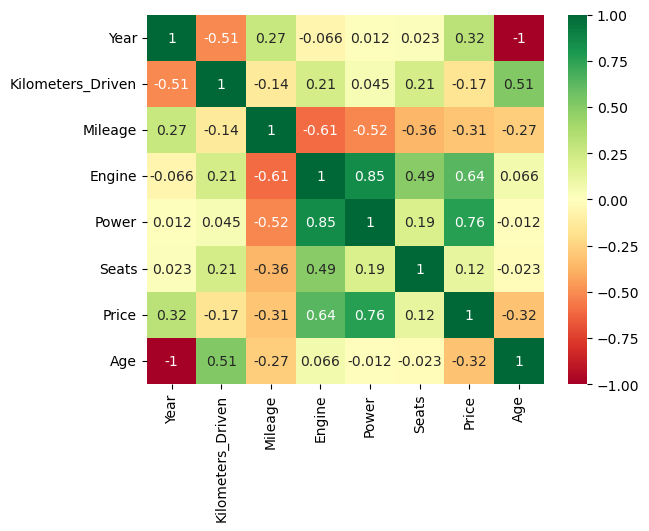

In [58]:
sns.heatmap(df_c.corr(numeric_only=True), annot=True, cmap='RdYlGn', center=0)

In [59]:
asc_num_features = df_c.corr(numeric_only=True)['Price'].sort_values(ascending=False)
asc_num_features 

Price                1.000000
Power                0.764098
Engine               0.635854
Year                 0.318702
Seats                0.123282
Kilometers_Driven   -0.166846
Mileage             -0.308463
Age                 -0.318702
Name: Price, dtype: float64

In [60]:
px.bar(asc_num_features, width=600, category_orders={'index':asc_num_features.index}, orientation='h')

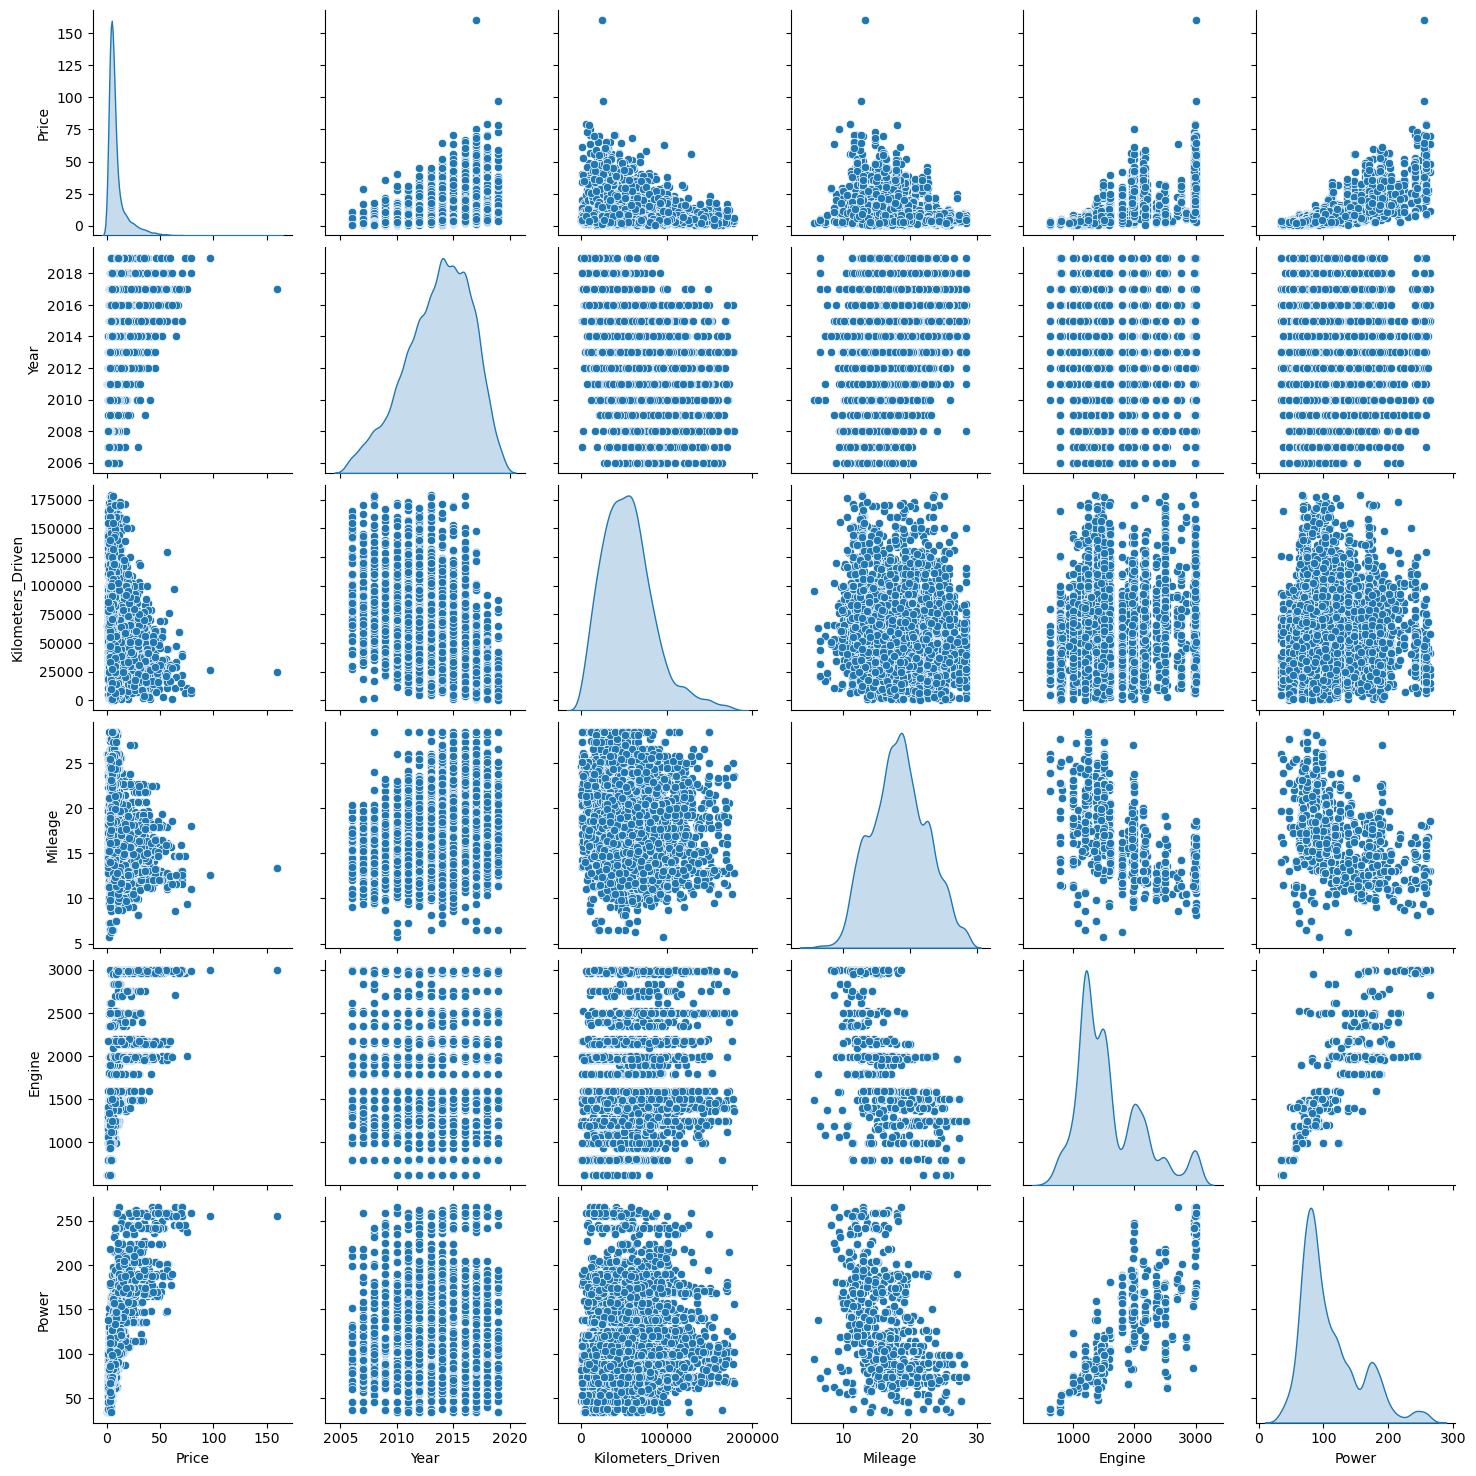

In [61]:
sns.pairplot(df_c[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']], diag_kind='kde')

# Saving the Cleaned Data

In [62]:
df_c.to_csv('../data/cleaned_data.csv', index=False)